In [213]:
#Install yfinance
pip install yfinance


SyntaxError: invalid syntax (<ipython-input-213-ade6ca36852b>, line 2)

In [280]:
#Import dependencies
import pandas as pd
from pandas import DataFrame
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import requests
import gmaps
import os
import gmaps
import json
from api_keys import gkey

#from api_keys import g_key

# Import API key

gmaps.configure(api_key=gkey)


In [281]:
#Get tickers for top 6 pharmaceutical companies
# "GE PG" 
tickers = yf.Tickers("LLY MRK PFE ZTS JNJ ABBV GE PG")
print(tickers)

yfinance.Tickers object <LLY,MRK,PFE,ZTS,JNJ,ABBV,GE,PG>


In [284]:
data = yf.download("LLY MRK PFE ZTS JNJ ABBV GE PG", start="2020-01-21", end="2020-03-19")

data.index

[*********************100%***********************]  8 of 8 completed


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-24',
               '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13', '2020-03-16', '2020-03-17',
               '2020-03-18'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [285]:
tickers = yf.Tickers("CLX")
print(tickers)

yfinance.Tickers object <CLX>


In [287]:
data_clx = yf.download("CLX", start="2020-01-21", end="2020-03-19")

data_clx.index

[*********************100%***********************]  1 of 1 completed


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-24',
               '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13', '2020-03-16', '2020-03-17',
               '2020-03-18'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [288]:
#Get only closing data
data_close = data["Close"]
data_close["Date"] = data_close.index


C:\Users\amber\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [289]:
data_close

,ABBV,GE,JNJ,LLY,MRK,PFE,PG,ZTS,Date
Date,,,,,,,,,
2020-01-21,87.989998,11.66,149.270004,140.910004,89.970001,40.340000,126.089996,141.929993,2020-01-21
2020-01-22,87.209999,11.37,148.250000,141.559998,89.650002,40.189999,126.309998,141.500000,2020-01-22
2020-01-23,85.269997,11.77,148.529999,141.210007,88.559998,40.709999,124.989998,138.339996,2020-01-23
2020-01-24,83.540001,11.71,148.320007,139.070007,85.980003,39.820000,125.139999,136.309998,2020-01-24
2020-01-27,84.019997,11.44,148.750000,138.309998,86.099998,40.160000,125.690002,135.960007,2020-01-27
2020-01-28,83.769997,11.73,149.500000,139.259995,86.250000,38.139999,126.029999,138.259995,2020-01-28
2020-01-29,83.199997,12.94,150.539993,139.919998,87.239998,37.580002,125.059998,138.509995,2020-01-29
2020-01-30,81.779999,12.73,150.360001,142.669998,86.500000,37.070000,125.949997,138.029999,2020-01-30
2020-01-31,81.019997,12.45,148.869995,139.639999,85.440002,37.240002,124.620003,134.210007,2020-01-31


In [290]:
data_close_plot = data_close.drop("Date", axis = 1)

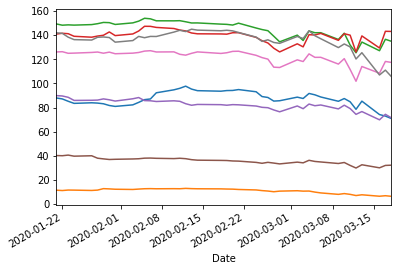

In [291]:

data_close_plot.plot(kind = "line", legend=False)

In [27]:
#check columns
data_close.columns

Index(['ABBV', 'GE', 'JNJ', 'LLY', 'MRK', 'PFE', 'PG', 'ZTS', 'Date'], dtype='object')

In [292]:
#Add Total Closing Price

data_close["Total"] = data_close["ABBV"] + data_close["JNJ"] + data_close["LLY"] + data_close["MRK"] + data_close["PFE"]+data_close["ZTS"] + data_close["PG"] + data_close["GE"]

C:\Users\amber\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


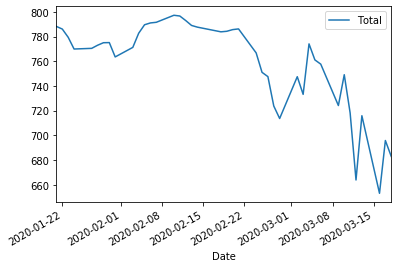

In [293]:
data_close.plot(y = "Total",kind = "line")

In [294]:
# Import COVID confirmed cases data
data_COVID = "Confirmed.csv"
data_COVID_df = pd.read_csv(data_COVID)
data_COVID_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,53,59,70,75,82,114,147,177,212,272
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,581,639,639,701,773,839,825,878,889,924
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,160,178,178,200,212,226,243,266,313,345
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,129,149,149,197,238,428,566,673,790,900


In [295]:
data_non_US = data_COVID_df

data_non_US.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,53,59,70,75,82,114,147,177,212,272
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,581,639,639,701,773,839,825,878,889,924
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,160,178,178,200,212,226,243,266,313,345
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,129,149,149,197,238,428,566,673,790,900


In [296]:
data_US = data_non_US.loc[data_non_US["Country/Region"] == "US"]

In [297]:
data_US.index =  pd.to_datetime(data_US.index)
data_US.index 

DatetimeIndex(['1970-01-01 00:00:00.000000098',
               '1970-01-01 00:00:00.000000099',
               '1970-01-01 00:00:00.000000100',
               '1970-01-01 00:00:00.000000101',
               '1970-01-01 00:00:00.000000102',
               '1970-01-01 00:00:00.000000103',
               '1970-01-01 00:00:00.000000104',
               '1970-01-01 00:00:00.000000105',
               '1970-01-01 00:00:00.000000106',
               '1970-01-01 00:00:00.000000107',
               ...
               '1970-01-01 00:00:00.000000394',
               '1970-01-01 00:00:00.000000395',
               '1970-01-01 00:00:00.000000396',
               '1970-01-01 00:00:00.000000397',
               '1970-01-01 00:00:00.000000398',
               '1970-01-01 00:00:00.000000399',
               '1970-01-01 00:00:00.000000414',
               '1970-01-01 00:00:00.000000417',
               '1970-01-01 00:00:00.000000431',
               '1970-01-01 00:00:00.000000448'],
              dtype=

In [298]:
Total_US = data_US.iloc[:,4:len(data_US.columns)].sum(axis = 0)
Total_US_df = pd.DataFrame({"Total":Total_US})
Total_US_df.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20'],
      dtype='object')

In [299]:
combined_US = pd.merge(Total_US_df, data_close, how = "inner" )

C:\Users\amber\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1100: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


In [300]:
#How to do with transpose so that I can avoid 
transpose = data_non_US.T

transpose.drop(['Province/State',"Country/Region", "Lat","Long"],inplace=True)
transpose.head()
covid_cases = pd.DataFrame({"Total_cases":transpose.sum(axis = 1)})

In [301]:
data_non_US.columns


Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20'],
      dtype='object')

In [304]:
#Extract the confirmed cases for Non US countries from Jan to March
data_non_us_months = data_non_US[[ '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20','3/16/20', '3/17/20', '3/18/20', '3/19/20']]

In [319]:
data_non_us_sum = pd.DataFrame({"Total":data_non_us_months.sum()})

In [320]:

data_non_us_sum["Date1"] = data_non_us_sum.index

data_non_us_sum["Date1"] = pd.to_datetime(data_non_us_sum["Date1"])


In [321]:
data_non_us_sum.dtypes

Total             int64
Date1    datetime64[ns]
dtype: object

In [322]:
data_non_us_sum 

,Total,Date1
1/22/20,555,2020-01-22
1/23/20,653,2020-01-23
1/24/20,941,2020-01-24
1/25/20,1434,2020-01-25
1/26/20,2118,2020-01-26
1/27/20,2927,2020-01-27
1/28/20,5578,2020-01-28
1/29/20,6166,2020-01-29
1/30/20,8234,2020-01-30
1/31/20,9927,2020-01-31


In [323]:
#data_close.rename(columns = {"Date":"Date1"})
data_close["Date1"] = data_close["Date"]
data_close.dtypes

C:\Users\amber\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ABBV            float64
GE              float64
JNJ             float64
LLY             float64
MRK             float64
PFE             float64
PG              float64
ZTS             float64
Date     datetime64[ns]
Total           float64
Date1    datetime64[ns]
dtype: object

In [324]:
covid_cases.head()
#covid_cases.index = pd.to_datetime(covid_cases.index) # does not work why?

,Total_cases
1/22/20,555.0
1/23/20,653.0
1/24/20,941.0
1/25/20,1434.0
1/26/20,2118.0


In [325]:
data_close1 = data_close.drop(["Date","Date1"], axis = 1)
data_close1.index

DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-24',
               '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13', '2020-03-16', '2020-03-17',
               '2020-03-18'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [326]:
#How to combine on index?

combined_t = pd.merge(covid_cases,data_close1, how = "inner",left_index=True, right_index=True)
combined_t.head()

,Total_cases,ABBV,GE,JNJ,LLY,MRK,PFE,PG,ZTS,Total
2020-01-22,555.0,87.209999,11.37,148.250000,141.559998,89.650002,40.189999,126.309998,141.500000,786.039994
2020-01-23,653.0,85.269997,11.77,148.529999,141.210007,88.559998,40.709999,124.989998,138.339996,779.379993
2020-01-24,941.0,83.540001,11.71,148.320007,139.070007,85.980003,39.820000,125.139999,136.309998,769.890016
2020-01-27,2927.0,84.019997,11.44,148.750000,138.309998,86.099998,40.160000,125.690002,135.960007,770.430001
2020-01-28,5578.0,83.769997,11.73,149.500000,139.259995,86.250000,38.139999,126.029999,138.259995,772.939983


In [327]:
combined = pd.merge(data_non_us_sum ,data_close, how = "inner", on ="Date1")
combined

,Total_x,Date1,ABBV,GE,JNJ,LLY,MRK,PFE,PG,ZTS,Date,Total_y
0,555,2020-01-22,87.209999,11.37,148.250000,141.559998,89.650002,40.189999,126.309998,141.500000,2020-01-22,786.039994
1,653,2020-01-23,85.269997,11.77,148.529999,141.210007,88.559998,40.709999,124.989998,138.339996,2020-01-23,779.379993
2,941,2020-01-24,83.540001,11.71,148.320007,139.070007,85.980003,39.820000,125.139999,136.309998,2020-01-24,769.890016
3,2927,2020-01-27,84.019997,11.44,148.750000,138.309998,86.099998,40.160000,125.690002,135.960007,2020-01-27,770.430001
4,5578,2020-01-28,83.769997,11.73,149.500000,139.259995,86.250000,38.139999,126.029999,138.259995,2020-01-28,772.939983
5,6166,2020-01-29,83.199997,12.94,150.539993,139.919998,87.239998,37.580002,125.059998,138.509995,2020-01-29,774.989980
6,8234,2020-01-30,81.779999,12.73,150.360001,142.669998,86.500000,37.070000,125.949997,138.029999,2020-01-30,775.089993
7,9927,2020-01-31,81.019997,12.45,148.869995,139.639999,85.440002,37.240002,124.620003,134.210007,2020-01-31,763.490005
8,19881,2020-02-03,82.300003,12.26,150.169998,141.000000,87.339996,37.509998,125.110001,135.520004,2020-02-03,771.210001
9,23892,2020-02-04,84.360001,12.58,151.600006,143.440002,88.360001,37.689999,125.660004,138.970001,2020-02-04,782.660013


In [328]:
combined.rename(columns = {"Total_x":"COVID_Cases", "Total_y":"Stock_Prices"})

,COVID_Cases,Date1,ABBV,GE,JNJ,LLY,MRK,PFE,PG,ZTS,Date,Stock_Prices
0,555,2020-01-22,87.209999,11.37,148.250000,141.559998,89.650002,40.189999,126.309998,141.500000,2020-01-22,786.039994
1,653,2020-01-23,85.269997,11.77,148.529999,141.210007,88.559998,40.709999,124.989998,138.339996,2020-01-23,779.379993
2,941,2020-01-24,83.540001,11.71,148.320007,139.070007,85.980003,39.820000,125.139999,136.309998,2020-01-24,769.890016
3,2927,2020-01-27,84.019997,11.44,148.750000,138.309998,86.099998,40.160000,125.690002,135.960007,2020-01-27,770.430001
4,5578,2020-01-28,83.769997,11.73,149.500000,139.259995,86.250000,38.139999,126.029999,138.259995,2020-01-28,772.939983
5,6166,2020-01-29,83.199997,12.94,150.539993,139.919998,87.239998,37.580002,125.059998,138.509995,2020-01-29,774.989980
6,8234,2020-01-30,81.779999,12.73,150.360001,142.669998,86.500000,37.070000,125.949997,138.029999,2020-01-30,775.089993
7,9927,2020-01-31,81.019997,12.45,148.869995,139.639999,85.440002,37.240002,124.620003,134.210007,2020-01-31,763.490005
8,19881,2020-02-03,82.300003,12.26,150.169998,141.000000,87.339996,37.509998,125.110001,135.520004,2020-02-03,771.210001
9,23892,2020-02-04,84.360001,12.58,151.600006,143.440002,88.360001,37.689999,125.660004,138.970001,2020-02-04,782.660013


In [329]:
combined.columns

Index(['Total_x', 'Date1', 'ABBV', 'GE', 'JNJ', 'LLY', 'MRK', 'PFE', 'PG',
       'ZTS', 'Date', 'Total_y'],
      dtype='object')

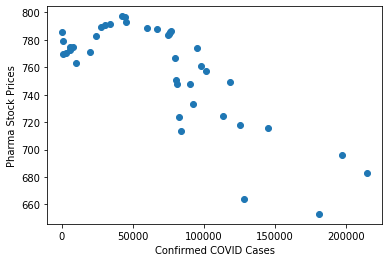

The correlation between COVID cases and Pharma Stocks is -0.78


In [330]:
# Scatter plot for top pharma stocks and COVID cases

x = combined["Total_x"]
y = combined["Total_y"]
plt.scatter(x,y)
plt.xlabel('Confirmed COVID Cases')
plt.ylabel('Pharma Stock Prices')
plt.show()

correlation = st.pearsonr(x,y)
print(f"The correlation between COVID cases and Pharma Stocks is {round(correlation[0],2)}")

Text(50, 15, 'y = -0.0x +655.67')

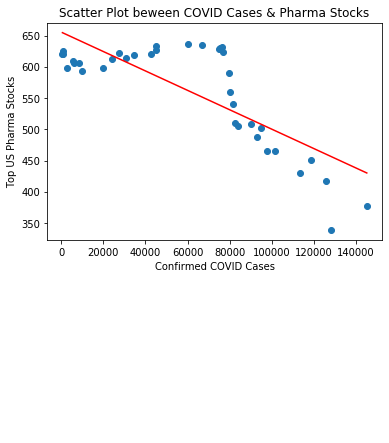

In [366]:
# Create equation of line to calculate predicted stock price
x_values = x
y_values = y
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values,marker="o", alpha=1)

plt.xlabel("Confirmed COVID Cases")
plt.ylabel("Top US Pharma Stocks")
plt.plot(x_values,regress_values,"r-")

plt.title("Scatter Plot beween COVID Cases & Pharma Stocks")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(50,15),fontsize=15,color="red")

In [332]:
import statsmodels.api as sm
X = x_values
y = y_values
# Note the difference in argument order
model = sm.OLS(y, X).fit()
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Total_y   R-squared (uncentered):                   0.599
Model:                            OLS   Adj. R-squared (uncentered):              0.588
Method:                 Least Squares   F-statistic:                              58.17
Date:                Fri, 20 Mar 2020   Prob (F-statistic):                    3.00e-09
Time:                        16:29:43   Log-Likelihood:                         -303.75
No. Observations:                  40   AIC:                                      609.5
Df Residuals:                      39   BIC:                                      611.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Total_x        0.0066      0.001      7.627      0.000       0.005       0.008
==============================================================================
Omnibus:                        5.163   Durbin-Watson:                   0.018
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                4.251
Skew:                          -0.792   Prob(JB):                        0.119
Kurtosis:                       3.205   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [333]:
#Analysing Clorox Stocks

data_clx.index

DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-24',
               '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13', '2020-03-16', '2020-03-17',
               '2020-03-18'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [334]:

data_clx_close = data_clx["Close"]


In [335]:
data_clx_close_df = pd.DataFrame({"Stocks_Price":data_clx_close})


In [336]:
data_clx_close_df["Date1"] = data_clx_close_df.index
data_clx_close_df

,Stocks_Price,Date1
Date,,
2020-01-21,159.100006,2020-01-21
2020-01-22,159.630005,2020-01-22
2020-01-23,159.070007,2020-01-23
2020-01-24,158.279999,2020-01-24
2020-01-27,159.960007,2020-01-27
2020-01-28,156.070007,2020-01-28
2020-01-29,155.210007,2020-01-29
2020-01-30,155.860001,2020-01-30
2020-01-31,157.309998,2020-01-31


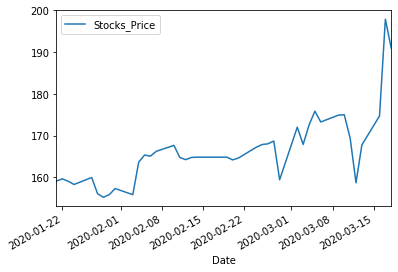

In [337]:

data_clx_plot = data_clx_close_df.drop("Date1", axis = 1)
data_clx_plot.plot(kind = "line")

In [338]:
data_non_us_sum

,Total,Date1
1/22/20,555,2020-01-22
1/23/20,653,2020-01-23
1/24/20,941,2020-01-24
1/25/20,1434,2020-01-25
1/26/20,2118,2020-01-26
1/27/20,2927,2020-01-27
1/28/20,5578,2020-01-28
1/29/20,6166,2020-01-29
1/30/20,8234,2020-01-30
1/31/20,9927,2020-01-31


In [339]:
combined_merge = pd.merge(data_clx_close_df,data_non_us_sum, how = "inner" )
combined_merge

,Stocks_Price,Date1,Total
0,159.630005,2020-01-22,555
1,159.070007,2020-01-23,653
2,158.279999,2020-01-24,941
3,159.960007,2020-01-27,2927
4,156.070007,2020-01-28,5578
5,155.210007,2020-01-29,6166
6,155.860001,2020-01-30,8234
7,157.309998,2020-01-31,9927
8,155.839996,2020-02-03,19881
9,163.619995,2020-02-04,23892


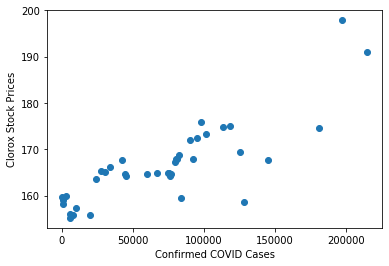

The correlation between COVID cases and Clorox Stocks is 0.82


In [340]:
 # Scatter Plot Clorox Pharma Stocks
y = combined_merge["Stocks_Price"]
x = combined_merge["Total"]
plt.scatter(x,y)
plt.xlabel('Confirmed COVID Cases')
plt.ylabel('Clorox Stock Prices')
plt.show()

correlation = st.pearsonr(x,y)
print(f"The correlation between COVID cases and Clorox Stocks is {round(correlation[0],2)}")

NameError: name 'lin2' is not defined

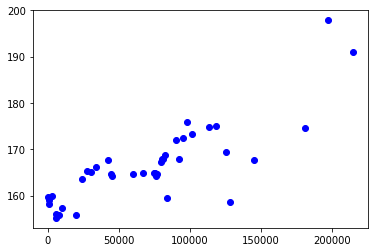

In [341]:
#lin2 = LinearRegression()
plt.scatter(x, y, color = 'blue') 
  
plt.plot(x, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 
  
plt.show() 

Text(50, 15, 'y = -0.0x +655.67')

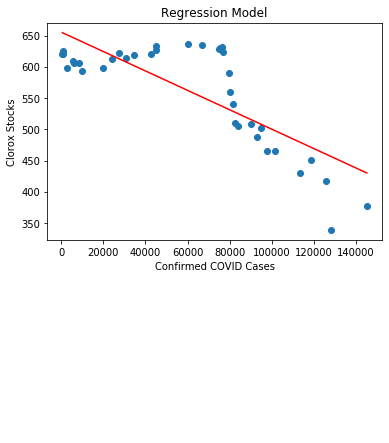

In [369]:
# Create equation of line to calculate predicted stock price
x_values = x
y_values = y
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values,marker="o", alpha=1)

plt.xlabel("Confirmed COVID Cases")
plt.ylabel("Clorox Stocks")
plt.plot(x_values,regress_values,"r-")

plt.title("Regression Model")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(50,15),fontsize=15,color="red")

In [113]:
# Oil Stocks ticker symbol SPSIOP

tickers = yf.Tickers("XOM SLB CVX HAL COP")
print(tickers)

yfinance.Tickers object <XOM,SLB,CVX,HAL,COP>


In [114]:
data_oil = yf.download("XOM SLB CVX HAL COP", start="2020-01-21", end="2020-03-15")

data_oil.index

[*********************100%***********************]  5 of 5 completed


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-24',
               '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [115]:
data_oil.head()


Adj Close                                                   Close  \
                  COP         CVX        HAL        SLB        XOM        COP   
Date                                                                            
2020-01-21  63.579990  112.000938  23.521532  36.412155  66.623528  64.029999   
2020-01-22  62.567158  111.595673  23.679861  36.146084  66.239044  63.009998   
2020-01-23  62.696243  111.793365  23.333519  35.899723  65.824982  63.139999   
2020-01-24  62.179897  110.557800  22.858536  35.249332  65.381355  62.619999   
2020-01-27  60.611004  109.114670  21.423693  33.465675  63.823715  61.040001   

                                                     ...       Open  \
                   CVX    HAL        SLB        XOM  ...        COP   
Date                                                 ...              
2020-01-21  113.309998  23.77  36.950001  67.580002  ...  64.570000   
2020-01-22  112.900002  23.93  36.680000  67.190002  ...  63.799999   
2020-01-23  113.099998  23.58  36.430000  66.769997  ...  62.009998   
2020-01-24  111.849998  23.10  35.770000  66.320000  ...  62.700001   
2020-01-27  110.389999  21.65  33.959999  64.739998  ...  61.369999   

                                                          Volume           \
                   CVX        HAL        SLB        XOM      COP      CVX   
Date                                                                        
2020-01-21  115.099998  23.780001  37.630001  68.379997  6974000  8470300   
2020-01-22  113.099998  23.809999  36.799999  67.559998  6755800  5589900   
2020-01-23  112.400002  23.680000  36.070000  66.709999  6199900  8007800   
2020-01-24  112.790001  23.500000  36.220001  66.540001  5689500  6920000   
2020-01-27  110.250000  22.400000  34.549999  65.419998  7321100  7609800   

                                          
                 HAL       SLB       XOM  
Date                                      
2020-01-21  21047800  16710200  17982600  
2020-01-22  12042500  12796800  17033100  
2020-01-23  12567900  11844000  19605900  
2020-01-24  11684500  10408600  18238600  
2020-01-27  18996600  17360600  21231000  

[5 rows x 30 columns]

In [122]:
data_oil_close = data_oil["Close"]
data_oil_close.head()

,COP,CVX,HAL,SLB,XOM
Date,,,,,
2020-01-21,64.029999,113.309998,23.77,36.950001,67.580002
2020-01-22,63.009998,112.900002,23.93,36.680000,67.190002
2020-01-23,63.139999,113.099998,23.58,36.430000,66.769997
2020-01-24,62.619999,111.849998,23.10,35.770000,66.320000
2020-01-27,61.040001,110.389999,21.65,33.959999,64.739998


In [126]:
data_oil_close["Total"] = data_oil_close.sum(axis = 1)
#data_oil_Total = data_oil_close["Total"]
data_oil_close.head()

C:\Users\amber\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,COP,CVX,HAL,SLB,XOM,Total
Date,,,,,,
2020-01-21,64.029999,113.309998,23.77,36.950001,67.580002,305.639999
2020-01-22,63.009998,112.900002,23.93,36.680000,67.190002,303.710003
2020-01-23,63.139999,113.099998,23.58,36.430000,66.769997,303.019995
2020-01-24,62.619999,111.849998,23.10,35.770000,66.320000,299.659998
2020-01-27,61.040001,110.389999,21.65,33.959999,64.739998,291.779997


In [118]:
data_oil_Total["Date1"] = data_oil_Total.index


C:\Users\amber\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\amber\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [119]:
data_oil_Total.head()

Date
2020-01-21    7.11864e+07
2020-01-22    5.42196e+07
2020-01-23     5.8227e+07
2020-01-24    5.29427e+07
2020-01-27    7.25206e+07
Name: Total, dtype: object

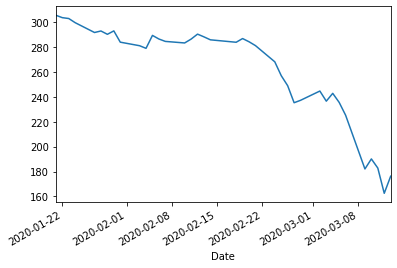

In [130]:
data_oil_close_Total = data_oil_close["Total"]

data_oil_close_Total.plot(kind = "line")
#data_oil["Total"] = data_oil.sum(axis = 1)

In [190]:
data_oil_close_Total.head()

Date
2020-01-21    305.639999
2020-01-22    303.710003
2020-01-23    303.019995
2020-01-24    299.659998
2020-01-27    291.779997
Name: Total, dtype: float64

In [196]:
data_oil_close_Total.index.to_datetime(format='%Y-%m-%d')

AttributeError: 'DatetimeIndex' object has no attribute 'to_datetime'

In [191]:
data_non_us_sum.head()

,Total,Date1
1/22/20,555,2020-01-22
1/23/20,653,2020-01-23
1/24/20,941,2020-01-24
1/25/20,1434,2020-01-25
1/26/20,2118,2020-01-26


In [197]:
combined_oil = pd.merge(data_oil_close_Total, data_non_us_sum, how = "inner", left_index=True, right_on='Date1')
combined_oil

,Total_x,Total_y,Date1
1/22/20,303.710003,555,2020-01-22
1/23/20,303.019995,653,2020-01-23
1/24/20,299.659998,941,2020-01-24
1/27/20,291.779997,2927,2020-01-27
1/28/20,292.990004,5578,2020-01-28
1/29/20,290.330004,6166,2020-01-29
1/30/20,293.070004,8234,2020-01-30
1/31/20,284.009996,9927,2020-01-31
2/3/20,281.149998,19881,2020-02-03
2/4/20,279.050001,23892,2020-02-04


In [ ]:
# Scatter Plot Oil Stocks
y = data_oil_close_Total["Total_x"]
x = combined_merge_airline["Total_y"]
plt.scatter(x,y)
plt.xlabel('Confirmed COVID Cases')
plt.ylabel('Airlines Stock Prices')
plt.show()

correlation = st.pearsonr(x,y)
print(f"The correlation between COVID cases and Airlines Stocks is {round(correlation[0],2)}")

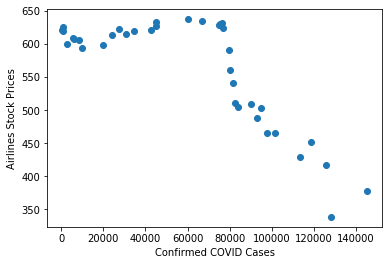

The correlation between COVID cases and Airlines Stocks is -0.79


In [352]:
 # Scatter Plot Airlines Stocks
y = combined_merge_airline["Total_x"]
x = combined_merge_airline["Total_y"]
plt.scatter(x,y)
plt.xlabel('Confirmed COVID Cases')
plt.ylabel('Airlines Stock Prices')
plt.show()

correlation = st.pearsonr(x,y)
print(f"The correlation between COVID cases and Airlines Stocks is {round(correlation[0],2)}")

In [351]:
# Top Airlines Stocks ticker symbols on NYSE
tickers = yf.Tickers("ALK AVH AZUL CEA ZNH VLRS CPA DAL FDX GOL LTM LUV SAVE")


In [343]:
data_airlines = yf.download("ALK AVH AZUL CEA ZNH VLRS CPA DAL FDX GOL LTM LUV SAVE", start="2020-01-21", end="2020-03-19")

data_airlines.index

[*********************100%***********************]  13 of 13 completed


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-24',
               '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13', '2020-03-16', '2020-03-17',
               '2020-03-18'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [344]:
data_airlines.head()

Adj Close                                                     \
                  ALK   AVH       AZUL        CEA         CPA        DAL   
Date                                                                       
2020-01-21  64.623512  4.73  42.820000  24.610001  100.189415  59.926399   
2020-01-22  65.220131  4.57  42.720001  24.850000  101.646324  59.231194   
2020-01-23  66.801170  4.70  43.830002  24.440001  102.032845  59.856876   
2020-01-24  66.343765  4.63  42.599998  24.090000  101.279625  58.406887   
2020-01-27  64.971542  4.57  40.750000  22.400000   98.118042  56.440460   

                                                    ...  Volume          \
                   FDX        GOL   LTM        LUV  ...     CEA     CPA   
Date                                                ...                   
2020-01-21  156.741928  17.270000  8.74  53.334736  ...  109500  339100   
2020-01-22  154.761871  17.660000  8.75  53.274963  ...   81100  592900   
2020-01-23  154.105194  18.680000  8.63  55.187603  ...   60700  235200   
2020-01-24  153.299240  18.030001  8.75  56.333191  ...   44900  138700   
2020-01-27  147.747162  16.820000  8.11  56.034344  ...  115400  416800   

                                                                           \
                 DAL      FDX      GOL      LTM      LUV     SAVE    VLRS   
Date                                                                        
2020-01-21  16592000  2460400   742300  1189500  6753500  1974000  264200   
2020-01-22   7096400  1911100   694300   581700  5303600   946300  630500   
2020-01-23   7774500  2059100  1064100   515900  6784500  1237300  414300   
2020-01-24  10989500  1973600   759400  1021200  7995100  1255400  333600   
2020-01-27  13090200  3368400  1451900  1280100  8275100  1085200  720600   

                    
               ZNH  
Date                
2020-01-21   87600  
2020-01-22   81400  
2020-01-23   59900  
2020-01-24   53800  
2020-01-27  135100  

[5 rows x 78 columns]

In [345]:
data_airlines_close = data_airlines["Close"]
data_airlines_close["Total"] = data_airlines_close.sum(axis = 1)

C:\Users\amber\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [346]:
data_airlines_close

,ALK,AVH,AZUL,CEA,CPA,DAL,FDX,GOL,LTM,LUV,SAVE,VLRS,ZNH,Total
Date,,,,,,,,,,,,,,
2020-01-21,64.989998,4.73,42.820000,24.610001,101.089996,60.340000,157.529999,17.270000,8.74,53.540001,41.720001,11.26,30.809999,619.449996
2020-01-22,65.589996,4.57,42.720001,24.850000,102.559998,59.639999,155.539993,17.660000,8.75,53.480000,42.599998,11.99,30.559999,620.509985
2020-01-23,67.180000,4.70,43.830002,24.440001,102.949997,60.270000,154.880005,18.680000,8.63,55.400002,42.840000,11.93,30.340000,626.070007
2020-01-24,66.720001,4.63,42.599998,24.090000,102.190002,58.810001,154.070007,18.030001,8.75,56.549999,42.099998,11.77,29.590000,619.900010
2020-01-27,65.339996,4.57,40.750000,22.400000,99.000000,56.830002,148.490005,16.820000,8.11,56.250000,41.320000,11.69,27.480000,599.050002
2020-01-28,65.540001,4.65,44.299999,22.840000,100.019997,57.480000,148.399994,17.219999,8.37,57.599998,42.400002,12.49,27.700001,609.009990
2020-01-29,66.889999,4.68,42.310001,23.290001,99.300003,56.650002,148.059998,16.520000,8.23,56.889999,42.709999,12.78,28.450001,606.760003
2020-01-30,66.010002,4.76,42.029999,23.030001,100.050003,57.099998,148.259995,16.430000,8.29,55.830002,42.439999,13.00,28.379999,605.609998
2020-01-31,64.589996,4.75,41.500000,22.790001,97.959999,55.740002,144.639999,16.030001,8.27,54.980000,41.070000,12.99,27.610001,592.919998


In [347]:
data_airlines_total = data_airlines_close["Total"]
data_airlines_df = pd.DataFrame({"Total":data_airlines_close["Total"]})
data_airlines_df["Date1"] = data_airlines_df.index

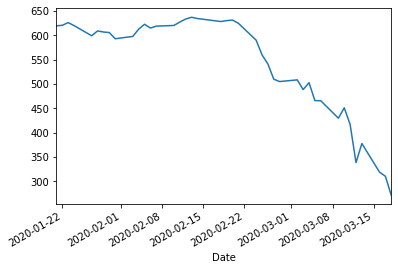

In [348]:
data_airlines_total.plot(kind = "line")

In [28]:
combined_merge_airline = pd.merge(data_airlines_df,data_non_us_sum, on ="Date1", how = "inner" )
combined_merge_airline.head()

,Total_x,Date1,Total_y
0,620.509985,2020-01-22,555
1,626.070007,2020-01-23,653
2,619.900010,2020-01-24,941
3,599.050002,2020-01-27,2927
4,609.009990,2020-01-28,5578


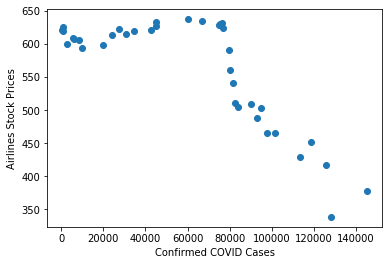

The correlation between COVID cases and Airlines Stocks is -0.79


In [353]:
 # Scatter Plot Airlines Stocks
y = combined_merge_airline["Total_x"]
x = combined_merge_airline["Total_y"]
plt.scatter(x,y)
plt.xlabel('Confirmed COVID Cases')
plt.ylabel('Airlines Stock Prices')
plt.show()

correlation = st.pearsonr(x,y)
print(f"The correlation between COVID cases and Airlines Stocks is {round(correlation[0],2)}")

Text(50, 15, 'y = -0.0x +655.67')

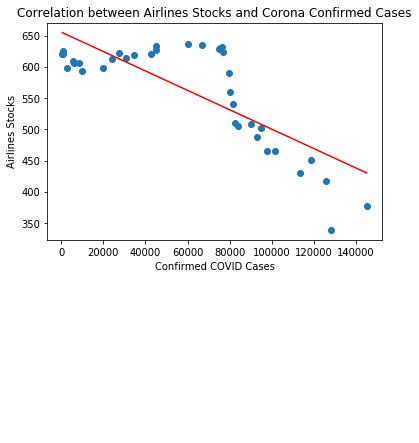

In [367]:
# Create equation of line to calculate predicted stock price
x_values = combined_merge_airline["Total_y"]
y_values = combined_merge_airline["Total_x"]
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values,marker="o", alpha=1)

plt.xlabel("Confirmed COVID Cases")
plt.ylabel("Airlines Stocks")
plt.plot(x_values,regress_values,"r-")

plt.title("Correlation between Airlines Stocks and Corona Confirmed Cases")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(50,15),fontsize=15,color="red")

In [355]:
# Ask the tutor or TA
data_non_US.head()
#sum(data_non_US.sum().tolist()[4:])
#data_non_US.iloc[:,4:len(data_non_US.columns)-1].sum(axis = 1)
data_non_US["Total"] = data_non_US.iloc[:,4:len(data_non_US.columns)-1].sum(axis = 1)

In [356]:
data_non_US.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,Total
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,59,70,75,82,114,147,177,212,272,2431
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,639,701,773,839,825,878,889,924,12584
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,178,200,212,226,243,266,313,345,4943
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,54
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,149,197,238,428,566,673,790,900,4472


In [357]:
#data_non_US = data_non_US.dropna()

locations = data_non_US[["Lat","Long"]]
# Fill NaN values and convert to float

weight = data_non_US["3/19/20"]



In [358]:
gmaps.configure(api_key=gkey)

#Create a list containing coordinates
# Plot Heatmap
fig = gmaps.figure(center=(32,14),  zoom_level=1)
weight
# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weight, 
                                 dissipating=False, max_intensity=200,
                                 point_radius= 2)

# Add layer
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [226]:
China = data_non_US.loc[data_non_US["Country/Region"] == "China"]
US = data_non_US.loc[data_non_US["Country/Region"] == "US"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,Total
155,Hubei,China,30.9756,112.2707,444,444,549,761,1058,1423,...,67666,67707,67743,67760,67773,67781,67786,67790,67794,2352488
159,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,1352,1352,1352,1353,1356,1356,1356,1356,1360,55927
160,Henan,China,33.8820,113.6140,5,5,9,32,83,128,...,1272,1272,1272,1272,1273,1273,1273,1273,1273,51626
161,Zhejiang,China,29.1832,120.0934,10,27,43,62,104,128,...,1215,1215,1215,1215,1215,1215,1215,1227,1231,51334
162,Hunan,China,27.6104,111.7088,4,9,24,43,69,100,...,1018,1018,1018,1018,1018,1018,1018,1018,1018,42112


In [362]:
#increasing stocks

tickers = yf.Tickers("GILD NVAX")
print(tickers)


yfinance.Tickers object <GILD,NVAX>


In [363]:
data_new = yf.download("GILD NVAX", start="2020-01-21", end="2020-03-19")

data_new.index

[*********************100%***********************]  2 of 2 completed


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-10', '2020-02-11',
               '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-24',
               '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13', '2020-03-16', '2020-03-17',
               '2020-03-18'],
              dtype='datetime64[ns]', name='Date', freq=None)

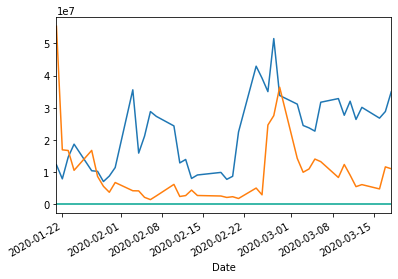

In [364]:
data_new.plot(kind = "line", legend=False)